**Type I Data - Without SVI**

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


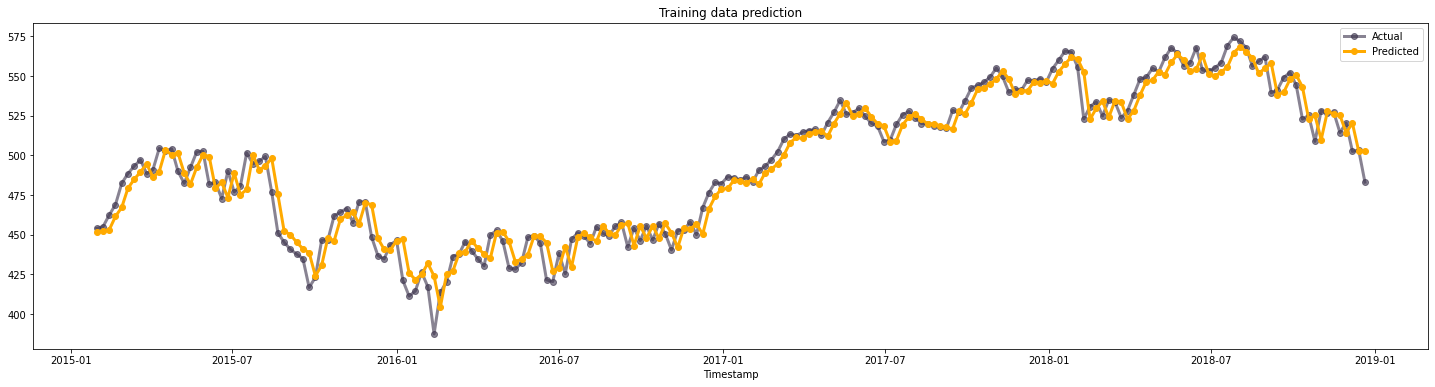

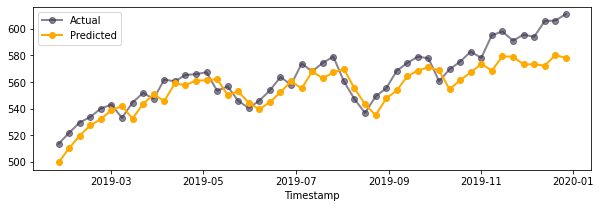

RMSE SVM: 13.55138836772146
MAE SVM: 11.40317865963006


In [120]:
# Importing SVI Data & Renaming
aex = pd.read_csv(r"/content/drive/MyDrive/AEX_5years_new.csv")
aex = aex.rename(columns={'AEX: (Wereldwijd)': 'AEX SVI'})
amx = pd.read_csv(r"/content/drive/MyDrive/AMX_5years_new.csv")
amx = amx.rename(columns={'AMX Index: (Wereldwijd)': 'AMX SVI'})
dfaex = pd.DataFrame(aex)
dfamx = pd.DataFrame(amx)

# Renaming Columns 
dfaex = dfaex.rename(columns={'Week': 'Date'})
dfaex['Date'] = pd.to_datetime(dfaex['Date'])
dfaex = dfaex.set_index('Date')

dfamx = dfamx.rename(columns={'Week': 'Date'})
dfamx = dfamx.set_index('Date')

# Pulling Yahoo Finance Data
# Defining tickers & dates
ticker_aex = ['^AEX']
ticker_amx = ['^AMX']
start_date = '2015-01-01'
end_date = '2019-12-28'

# Downloading & transforming data to weekly data machting SVI
yfaex = yf.download(ticker_aex, start_date, end_date)
yfaex = yfaex.asfreq('W-FRI', method='pad') 
yfaex = pd.DataFrame(yfaex)

yfamx = yf.download(ticker_amx, start_date, end_date)
yfamx = yfamx.asfreq('W-FRI', method='pad') 
yfamx = pd.DataFrame(yfamx)

# Merging Datasets
df = pd.merge(dfaex, yfaex, left_index=True, right_index=True, how='outer')
dfamx = pd.merge(dfamx, yfamx, left_index=True, right_index=True, how='outer')
df

# Only Open Prices
columns = ['Open']
df = df[columns]

# Train Test
train_start_dt = '2015-01-01'
test_start_dt = '2018-12-28'
train = df.copy()[(df.index >= train_start_dt) & (df.index < test_start_dt)][['Open']]
test = df.copy()[df.index >= test_start_dt][['Open']]

# Scaling Data
scaler = MinMaxScaler()
train['Open'] = scaler.fit_transform(train)
test['Open'] = scaler.transform(test)

# Converting to numpy arrays
train_data = train.values
test_data = test.values

# Defining Timesteps
timesteps=5
train_data_timesteps=np.array([[j for j in train_data[i:i+timesteps]] for i in range(0,len(train_data)-timesteps+1)])[:,:,0]
test_data_timesteps=np.array([[j for j in test_data[i:i+timesteps]] for i in range(0,len(test_data)-timesteps+1)])[:,:,0]
x_train, y_train = train_data_timesteps[:,:timesteps-1],train_data_timesteps[:,[timesteps-1]]
x_test, y_test = test_data_timesteps[:,:timesteps-1],test_data_timesteps[:,[timesteps-1]]

# Defining the model
model = SVR(kernel='rbf',gamma=0.5, C=10, epsilon = 0.05)
model.fit(x_train, y_train[:,0])
SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.05, gamma=0.5,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# Reshape predictions & original data
y_train_pred = model.predict(x_train).reshape(-1,1)
y_test_pred = model.predict(x_test).reshape(-1,1)

# Rescale
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)
y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)
train_timestamps = df[(df.index < test_start_dt) & (df.index >= train_start_dt)].index[timesteps-1:]
test_timestamps = df[test_start_dt:].index[timesteps-1:]

# Prediction on Training Data
plt.figure(figsize=(25,6))
plt.plot(train_timestamps, y_train, color = '#39304A', marker = 'o', linewidth=3.0, alpha = 0.6)
plt.plot(train_timestamps, y_train_pred, color = '#FFAA00', marker = 'o', linewidth=3.0)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction")
plt.show()

# Prediction on Test Data
plt.figure(figsize=(10,3))
plt.plot(test_timestamps, y_test, color = '#39304A', marker = 'o', linewidth=2.0, alpha = 0.6)
plt.plot(test_timestamps, y_test_pred, color = '#FFAA00', marker = 'o', linewidth=2.0)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.show()

# Evaluation
from sklearn.metrics import mean_absolute_error as mae
rmse = np.sqrt(np.mean(((y_test_pred - y_test) ** 2)))
print(f'RMSE SVM: {rmse}')
error = mae(y_test, y_test_pred)
print(f'MAE SVM: {error}')

**Type II Data - With SVI**

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


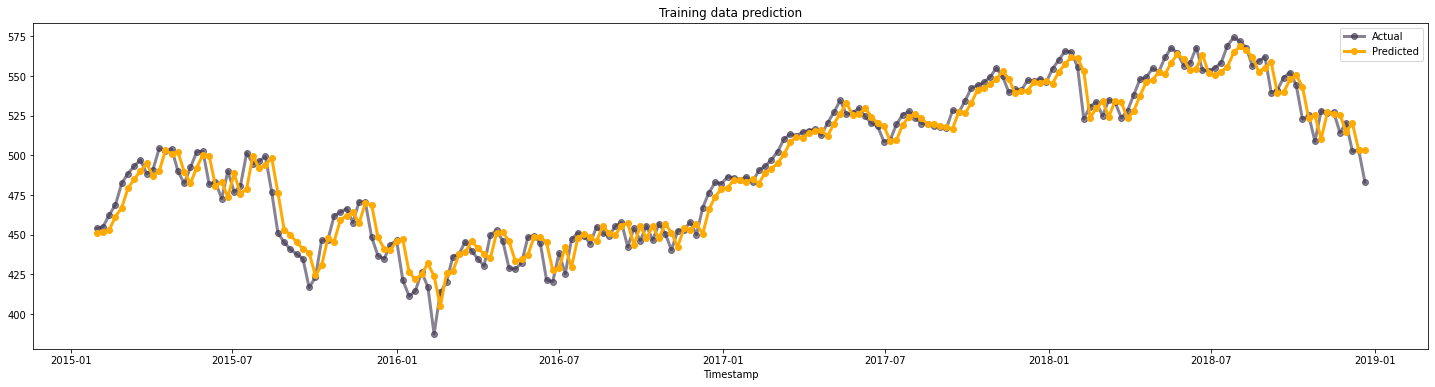

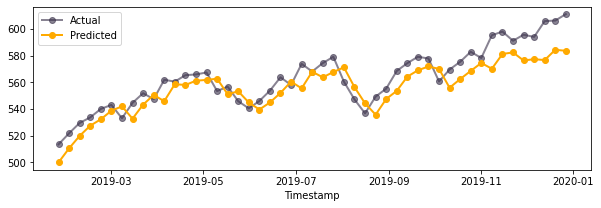

RMSE SVM: 12.442886804252728
MAE SVM: 10.75560215405558


In [119]:
# Importing SVI Data & Renaming
aex = pd.read_csv(r"/content/drive/MyDrive/AEX_5years_new.csv")
aex = aex.rename(columns={'AEX: (Wereldwijd)': 'AEX SVI'})
amx = pd.read_csv(r"/content/drive/MyDrive/AMX_5years_new.csv")
amx = amx.rename(columns={'AMX Index: (Wereldwijd)': 'AMX SVI'})
dfaex = pd.DataFrame(aex)
dfamx = pd.DataFrame(amx)

# Renaming Columns 
dfaex = dfaex.rename(columns={'Week': 'Date'})
dfaex['Date'] = pd.to_datetime(dfaex['Date'])
dfaex = dfaex.set_index('Date')

dfamx = dfamx.rename(columns={'Week': 'Date'})
dfamx = dfamx.set_index('Date')

# Pulling Yahoo Finance Data
# Defining tickers & dates
ticker_aex = ['^AEX']
ticker_amx = ['^AMX']
start_date = '2015-01-01'
end_date = '2019-12-28'

# Downloading & transforming data to weekly data machting SVI
yfaex = yf.download(ticker_aex, start_date, end_date)
yfaex = yfaex.asfreq('W-FRI', method='pad') 
yfaex = pd.DataFrame(yfaex)

yfamx = yf.download(ticker_amx, start_date, end_date)
yfamx = yfamx.asfreq('W-FRI', method='pad') 
yfamx = pd.DataFrame(yfamx)

# Merging Datasets
df = pd.merge(dfaex, yfaex, left_index=True, right_index=True, how='outer')
dfamx = pd.merge(dfamx, yfamx, left_index=True, right_index=True, how='outer')
df

# Open Prices and SVI
columns = ['Open', 'AEX SVI']
df = df[columns]

# Train Test
train_start_dt = '2015-01-01'
test_start_dt = '2018-12-28'
train = df.copy()[(df.index >= train_start_dt) & (df.index < test_start_dt)][['Open', 'AEX SVI']]
test = df.copy()[df.index >= test_start_dt][['Open', 'AEX SVI']]

# Scaling Data
scaler = MinMaxScaler()
train['Open'] = scaler.fit_transform(train)
test['Open'] = scaler.transform(test)

scalerx = MinMaxScaler()
train['AEX SVI'] = scalerx.fit_transform(train)
test['AEX SVI'] = scalerx.transform(test)

# Converting to numpy arrays
train_data = train.values
test_data = test.values

# Defining Timesteps
timesteps=5
train_data_timesteps=np.array([[j for j in train_data[i:i+timesteps]] for i in range(0,len(train_data)-timesteps+1)])[:,:,0]
test_data_timesteps=np.array([[j for j in test_data[i:i+timesteps]] for i in range(0,len(test_data)-timesteps+1)])[:,:,0]
x_train, y_train = train_data_timesteps[:,:timesteps-1],train_data_timesteps[:,[timesteps-1]]
x_test, y_test = test_data_timesteps[:,:timesteps-1],test_data_timesteps[:,[timesteps-1]]

# Defining the model
model = SVR(kernel='rbf',gamma=0.5, C=10, epsilon = 0.05)
model.fit(x_train, y_train[:,0])
SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.05, gamma=0.5,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# Reshape predictions & original data
y_train_pred = model.predict(x_train).reshape(-1,1)
y_test_pred = model.predict(x_test).reshape(-1,1)

# Rescale
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)
y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)
train_timestamps = df[(df.index < test_start_dt) & (df.index >= train_start_dt)].index[timesteps-1:]
test_timestamps = df[test_start_dt:].index[timesteps-1:]

# Prediction on Training Data
plt.figure(figsize=(25,6))
plt.plot(train_timestamps, y_train, color = '#39304A', marker = 'o', linewidth=3.0, alpha = 0.6)
plt.plot(train_timestamps, y_train_pred, color = '#FFAA00', marker = 'o', linewidth=3.0)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction")
plt.show()

# Prediction on Test Data
plt.figure(figsize=(10,3))
plt.plot(test_timestamps, y_test, color = '#39304A', marker = 'o', linewidth=2.0, alpha = 0.6)
plt.plot(test_timestamps, y_test_pred, color = '#FFAA00', marker = 'o', linewidth=2.0)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.show()

# Evaluation
from sklearn.metrics import mean_absolute_error as mae
rmse = np.sqrt(np.mean(((y_test_pred - y_test) ** 2)))
print(f'RMSE SVM: {rmse}')
error = mae(y_test, y_test_pred)
print(f'MAE SVM: {error}')